<a href="https://colab.research.google.com/github/benvictoria21/Machine-learning-project/blob/master/1_1_1_Perceptron_and_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Display plots in notebook 
%matplotlib inline
# Define plot's default figure size
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
   
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
data = np.hstack((X, y[:, np.newaxis]))

labels = iris.target_names
features = iris.feature_names

df = pd.DataFrame(data, columns=iris.feature_names+['label'])
df.label = df.label.map({k:v for k,v in enumerate(labels)})


In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "label"]
iris = pd.read_csv(url, names=columns)
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


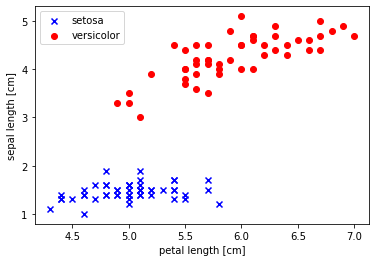

In [5]:
# give flags for setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract needed values: sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#display data in a plot
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.show()


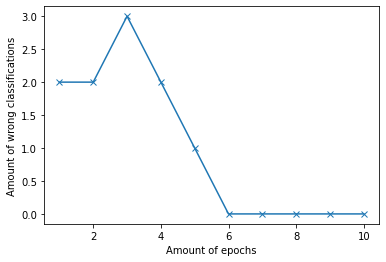

In [6]:
pcn = Perceptron(eta=0.1, n_iter=10)

pcn.fit(X, y)

plt.plot(range(1, len(pcn.errors_) + 1), pcn.errors_, marker='x')
plt.xlabel('Amount of epochs')
plt.ylabel('Amount of wrong classifications')

plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def generate_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('x', 'o')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


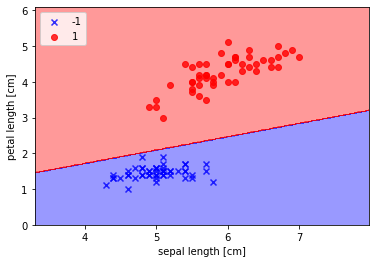

In [8]:
generate_decision_regions(X, y, classifier=pcn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()